# Laboratorio 8
#### Integrantes:  
Andres de la Roca  
Jun Woo Lee

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


## Carga de datos

In [161]:
df = pd.read_csv('houses_to_rent_v2.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

## Exploracion de datos

In [162]:
df.head()

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa_(r$),rent_amount_(r$),property_tax_(r$),fire_insurance_(r$),total_(r$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [163]:
df.tail()

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa_(r$),rent_amount_(r$),property_tax_(r$),fire_insurance_(r$),total_(r$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,-,acept,not furnished,0,1400,165,22,1587


In [164]:
df.describe()

,area,rooms,bathroom,parking_spaces,hoa_(r$),rent_amount_(r$),property_tax_(r$),fire_insurance_(r$),total_(r$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking_spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa_(r$)             10692 non-null  int64 
 9   rent_amount_(r$)     10692 non-null  int64 
 10  property_tax_(r$)    10692 non-null  int64 
 11  fire_insurance_(r$)  10692 non-null  int64 
 12  total_(r$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


<AxesSubplot: >

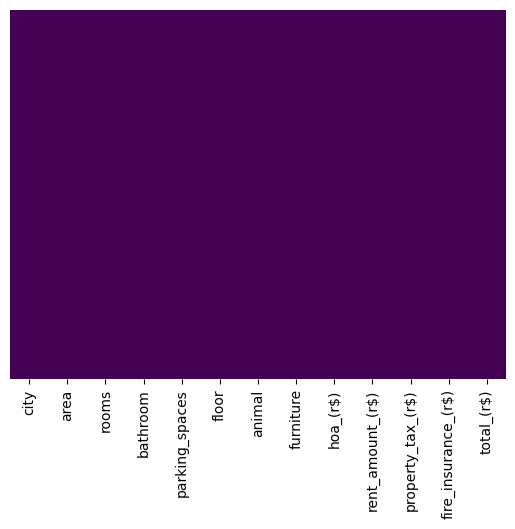

In [166]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [167]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking_spaces         0
floor                  0
animal                 0
furniture              0
hoa_(r$)               0
rent_amount_(r$)       0
property_tax_(r$)      0
fire_insurance_(r$)    0
total_(r$)             0
dtype: int64

C:\Users\Andre\AppData\Local\Temp\ipykernel_21632\2967624008.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

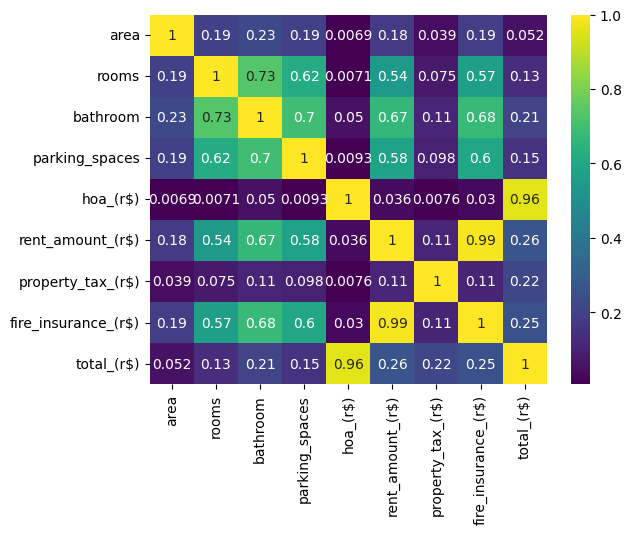

In [168]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [169]:
# Clean outliers from total column
df = df[df['total_(r$)'] < 100000]

# Clean outliers from area column
df = df[df['area'] < 1000]

# Clean outliers from room column
df = df[df['rooms'] < 10]

In [170]:
# Normalize floor column
df['floor'] = df['floor'].fillna(0)

# Delete non-numeric characters from floor column
df['floor'] = df['floor'].str.replace('-', '0')

# Convert floor column to numeric
df['floor'] = pd.to_numeric(df['floor'])

# Replace 0 values with mean
df['floor'] = df['floor'].replace('0', df['floor'].mean())
df['property_tax_(r$)'] = df['property_tax_(r$)'].replace('0', df['property_tax_(r$)'].mean())
df['fire_insurance_(r$)'] = df['fire_insurance_(r$)'].replace('0', df['fire_insurance_(r$)'].mean())
df['area'] = df['area'].replace('0', df['area'].mean())

df = df[df['floor'] < 30]


In [171]:
# Show the distribution of the target variable plt
plt.figure(figsize=(12, 6))

# Show the distribution of the target variable px
fig = px.histogram(df, x='rent_amount_(r$)', nbins=100, title='Distribucion de mensualidad (R$)')
fig.show()

<Figure size 1200x600 with 0 Axes>

In [172]:
# Show the distribution of selected features
fig = px.histogram(df, x='city', nbins=100, title='Distribucion de ciudad City')
fig.show()

fig = px.histogram(df, x='area', nbins=100, title='Distribucion de Area')
fig.show()

fig = px.histogram(df, x='rooms', nbins=100, title='Distribucion de Rooms')
fig.show()

fig = px.histogram(df, x='bathroom', nbins=100, title='Distribucion de Bathroom')
fig.show()

fig = px.histogram(df, x='parking_spaces', nbins=100, title='Distribucion de Parking Spaces')
fig.show()

fig = px.histogram(df, x='floor', nbins=100, title='Distribucion de Floor')
fig.show()

fig = px.histogram(df, x='animal', nbins=100, title='Distribucion de Animal')
fig.show()

fig = px.histogram(df, x='furniture', nbins=100, title='Distribucion de Furniture')
fig.show()


## Preprocesamiento de datos

In [173]:
city_group = df.groupby('city')['rent_amount_(r$)']

Q1 = city_group.quantile(.25)
Q3 = city_group.quantile(.75)

IQR = Q3 - Q1

#Limites
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [174]:
# Removiendo outliers
new_data = pd.DataFrame()

for city in city_group.groups.keys():
    is_city = df['city'] == city
    accepted_limit = ((df['rent_amount_(r$)'] >= lower_limit[city]) &
                     (df['rent_amount_(r$)'] <= upper_limit[city]))
    
    select = is_city & accepted_limit
    data_select = df[select]
    new_data = pd.concat([new_data, data_select])

new_data.head()


,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa_(r$),rent_amount_(r$),property_tax_(r$),fire_insurance_(r$),total_(r$)
21,Belo Horizonte,42,1,1,1,17,not acept,furnished,470,2690,172,36,3368
27,Belo Horizonte,64,2,2,1,11,acept,not furnished,352,1500,80,20,1952
42,Belo Horizonte,200,4,2,1,7,not acept,not furnished,850,2550,9,34,3443
43,Belo Horizonte,45,1,1,1,5,acept,not furnished,500,1631,192,12,2335
46,Belo Horizonte,100,3,1,0,13,not acept,not furnished,700,1220,10,17,1947


## Entrenamiento de modelo

In [175]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from skopt import gp_minimize

# ML models
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [176]:
cols = ['city', 'rooms', 'bathroom', 'parking_spaces', 'fire_insurance_(r$)', 'furniture']

X = new_data[cols]
X.head()

,city,rooms,bathroom,parking_spaces,fire_insurance_(r$),furniture
21,Belo Horizonte,1,1,1,36,furnished
27,Belo Horizonte,2,2,1,20,not furnished
42,Belo Horizonte,4,2,1,34,not furnished
43,Belo Horizonte,1,1,1,12,not furnished
46,Belo Horizonte,3,1,0,17,not furnished


In [177]:
catTransformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [178]:
numTransformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [179]:
for col in X:
    X = X.astype('category')
X['fire_insurance_(r$)'] = X['fire_insurance_(r$)'].astype('int64')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9950 entries, 21 to 10691
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   city                 9950 non-null   category
 1   rooms                9950 non-null   category
 2   bathroom             9950 non-null   category
 3   parking_spaces       9950 non-null   category
 4   fire_insurance_(r$)  9950 non-null   int64   
 5   furniture            9950 non-null   category
dtypes: category(5), int64(1)
memory usage: 205.5 KB


In [180]:
y = new_data['rent_amount_(r$)']
y.head(10)

21    2690
27    1500
42    2550
43    1631
46    1220
70    2422
73    2100
77    2700
84    1200
85    2500
Name: rent_amount_(r$), dtype: int64

In [181]:
numFeatures = X.select_dtypes(include=['int64', 'float64']).columns
numFeatures

Index(['fire_insurance_(r$)'], dtype='object')

In [182]:
catFeatures = X.select_dtypes(include=['category']).columns
catFeatures

Index(['city', 'rooms', 'bathroom', 'parking_spaces', 'furniture'], dtype='object')

In [183]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numTransformer, numFeatures),
        ('categoric', catTransformer, catFeatures)
    ])

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [185]:
regressors = [
    LinearRegression(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    SVR(),
    XGBRegressor()
]


In [186]:
# np.random.seed(42)

for regressor in regressors:
    estimator = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])

    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)

    print(regressor)

    print('MAE: ', mean_absolute_error(y_test, y_pred))
    print('MSE: ', mean_squared_error(y_test, y_pred))
    print('r2_score', r2_score(y_test, y_pred))
    print('\n')

LinearRegression()
MAE:  218.85068414832728
MSE:  129875.75609254127
r2_score 0.9786130756353325


RandomForestRegressor()
MAE:  142.01236283953705
MSE:  91455.87106311426
r2_score 0.9849397620004006


DecisionTreeRegressor()
MAE:  148.3176256953473
MSE:  137813.59864116003
r2_score 0.9773059337690324


SVR()
MAE:  1377.831165718107
MSE:  4729348.79376471
r2_score 0.22120780668020312


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constrain

In [188]:
# Entrenar con el mejor modelo
estimator = XGBRegressor(
    colsample_bytree=0.8,
    gamma=0,
    learning_rate=0.01,
    max_depth=5,
    n_estimators=950,
    subsample=1,
)

In [189]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', estimator)
])

In [190]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['fire_insurance_(r$)'], dtype='object')),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['city', 'rooms', 'bathroom', 'parking_spaces', 'furniture'], dtype='object'))])),
                ('regressor',
                 XGBRe...
                              feature_types=None, gamma=0, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.01,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=950,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

## Resultados

In [192]:
preds = model.predict(X_test)

In [193]:
print('MAE: ', mean_absolute_error(y_test, preds))
print('MSE: ', mean_squared_error(y_test, preds))
print('r2_score', r2_score(y_test, preds))

MAE:  175.19618649890074
MSE:  91324.32506570622
r2_score 0.9849614239670499


C:\Users\Andre\AppData\Local\Temp\ipykernel_21632\63034970.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Andre\AppData\Local\Temp\ipykernel_21632\63034970.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




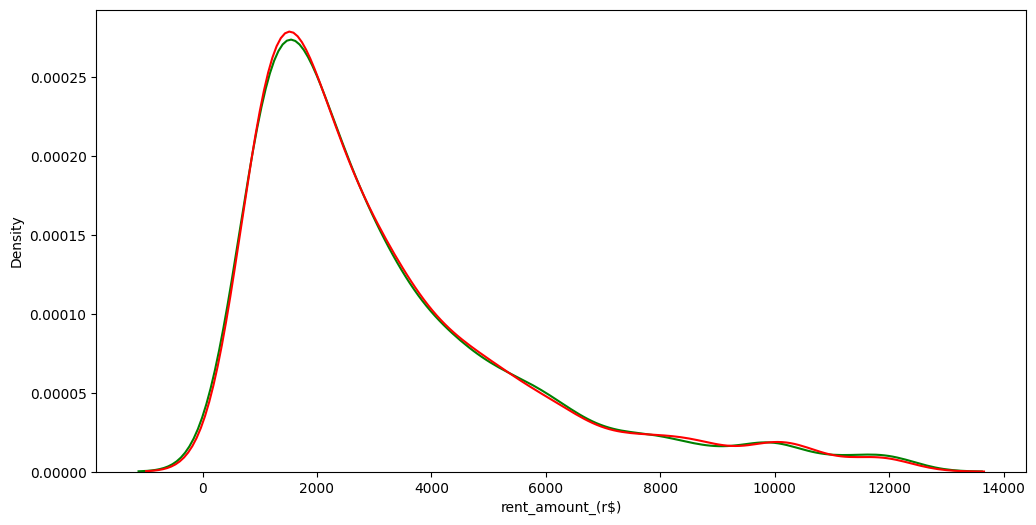

In [197]:
plt.figure(figsize=(12, 6))

sns.distplot(y_test, hist=False, color='g', label='Test')

sns.distplot(preds, hist=False, color='r', label='Predictions')

plt.show()

## Guardado de modelo

In [199]:
from joblib import dump, load
dump(model, 'modelo.joblib')

['modelo.joblib']

In [203]:
# Make a manual prediction
# city, rooms, bathroom, parking_spaces, fire_insurance_(r$), furniture

# Sao Paulo, 2, 1, 1, 17, furnished
# Campinas, 2, 1, 1, 17, furnished

input_data = {
    'city': ['São Paulo', 'Campinas'],
    'rooms': [2, 2],
    'bathroom': [1, 1],
    'parking_spaces': [1, 1],
    'fire_insurance_(r$)': [17, 17],
    'furniture': ['furnished', 'furnished']
}

input_df = pd.DataFrame(input_data)

input_df

,city,rooms,bathroom,parking_spaces,fire_insurance_(r$),furniture
0,São Paulo,2,1,1,17,furnished
1,Campinas,2,1,1,17,furnished


In [205]:
prediction = model.predict(input_df)
prediction

array([1511.4653, 1376.6405], dtype=float32)